In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint
from scipy import stats

In [2]:
np.round(0.06465323266163314, 4)

0.0647

In [3]:
proportion_confint(67, 100, 0.0647, method='wilson')

(0.5787876667557488, 0.7499923502948651)

In [4]:
np.round(stats.binomtest(67, 100, .75).pvalue, 4)

0.0822

In [5]:
for i in np.linspace(1, 0, 20000):
    prop = proportion_confint(67, 100, alpha=i, method='wilson')
    if prop[0] <= .75 <= prop[1]:
        break
prop, i

((0.5787712352752283, 0.7500049876693868), 0.06465323266163314)

In [6]:
data = pd.read_csv("data/pines.txt", sep="\t")
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [7]:
binx= np.arange(0, 201, 40)

In [8]:
trees = scipy.stats.binned_statistic_2d(data.iloc[:, 1], data.iloc[:, 0], None, statistic="count", bins=[binx, binx])[0]

In [9]:
trees

array([[18., 14., 12.,  8.,  7.],
       [26., 12., 24., 19.,  8.],
       [29., 22., 15., 31., 37.],
       [25., 34., 50., 50., 27.],
       [20., 25., 37.,  7., 27.]])

In [10]:
trees.mean()

23.36

In [11]:
trees_int = trees.ravel().astype(int)

In [12]:
observed_frequences = trees_int / trees_int.sum()

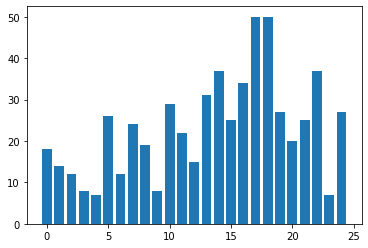

In [13]:
plt.bar(range(25), trees_int);

In [16]:
trees_int

array([18, 14, 12,  8,  7, 26, 12, 24, 19,  8, 29, 22, 15, 31, 37, 25, 34,
       50, 50, 27, 20, 25, 37,  7, 27])

In [57]:
gen_frequences = [584 * scipy.stats.uniform.pdf(x, 0, 25) for x in range(25)]

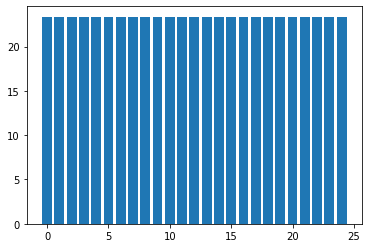

In [58]:
plt.bar(range(25), gen_frequences);

In [65]:
a = stats.chisquare(trees_int, gen_frequences, ddof=0)

In [66]:
np.round(a[0], 2)

150.59

In [67]:
a

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)